# Text Classification with Word Embeddings

## Team Members
- Prahlad Kumar Sahu - 2024ab05083

## Problem Statement
Develop an approach to effectively train a feedforward neural network for text classification while simultaneously deriving meaningful word embeddings.

## Part 1: Data Preparation

### Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1000)>


### 1a. Read and Preprocess the Data

Dataset Shape: (8695, 3)

First few rows:


,Id,Comment,Topic
0,0x840,A few things. You might have negative- frequen...,Biology
1,0xbf0,Is it so hard to believe that there exist part...,Physics
2,0x1dfc,There are bees,Biology
3,0xc7e,I'm a medication technician. And that's alot o...,Biology
4,0xbba,Cesium is such a pretty metal.,Chemistry



Missing values:
Id         0
Comment    0
Topic      0
dtype: int64

Topic distribution:
Topic
Biology      3591
Chemistry    2920
Physics      2184
Name: count, dtype: int64

Text length statistics:
count    8695.000000
mean      169.286832
std       294.992807
min         1.000000
25%        36.000000
50%        78.000000
75%       174.000000
max      7298.000000
Name: text_length, dtype: float64


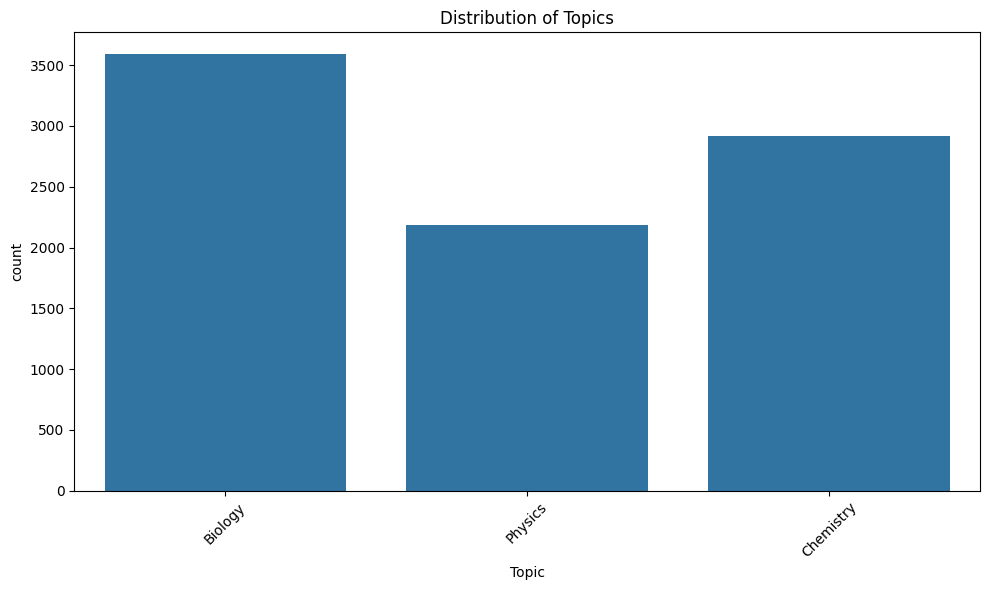

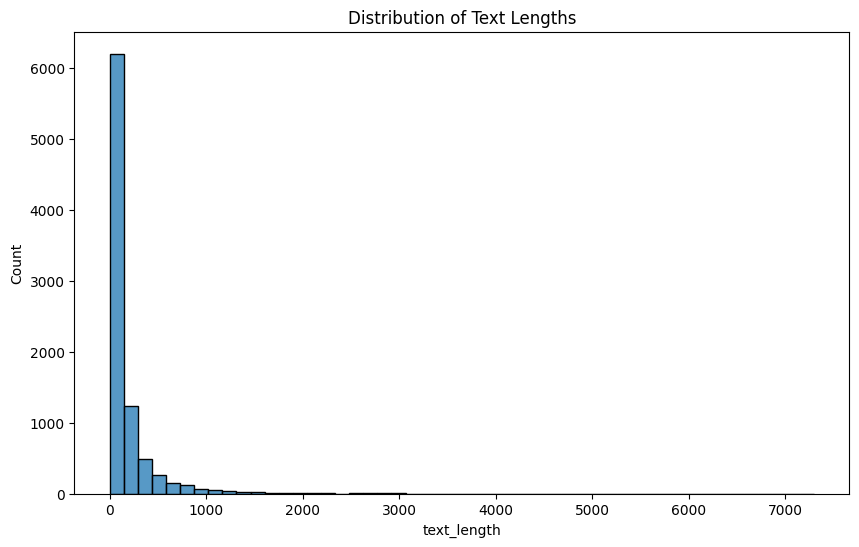

In [2]:
# Read the dataset
df = pd.read_csv('ScienceTopics.csv')

# Display basic information
print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
display(df.head())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Basic statistics
print("\nTopic distribution:")
print(df['Topic'].value_counts())

# Text length statistics
df['text_length'] = df['Comment'].str.len()
print("\nText length statistics:")
print(df['text_length'].describe())

# Visualize topic distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Topic')
plt.xticks(rotation=45)
plt.title('Distribution of Topics')
plt.tight_layout()
plt.show()

# Visualize text length distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='text_length', bins=50)
plt.title('Distribution of Text Lengths')
plt.show()

### 1b. Text Preprocessing and Tokenization

In [3]:
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Remove extra whitespace
    text = ' '.join(text.split())
    return text

# Apply preprocessing
df['processed_text'] = df['Comment'].apply(preprocess_text)

# Initialize tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['processed_text'])

# Convert text to sequences
sequences = tokenizer.texts_to_sequences(df['processed_text'])

# Pad sequences
max_length = max(len(seq) for seq in sequences)
X = pad_sequences(sequences, maxlen=max_length, padding='post')

# Create word index mapping
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1

print(f"Vocabulary size: {vocab_size}")
print(f"Maximum sequence length: {max_length}")

# Display some example tokens
print("\nExample tokens:")
for word, index in list(word_index.items())[:10]:
    print(f"{word}: {index}")

Vocabulary size: 19623
Maximum sequence length: 1264

Example tokens:
the: 1
to: 2
a: 3
of: 4
and: 5
is: 6
you: 7
it: 8
i: 9
in: 10


### 1c. Extract Features and Labels

In [4]:
# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Topic'])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")
print(f"Number of classes: {len(label_encoder.classes_)}")
print("\nClass mapping:")
for i, class_name in enumerate(label_encoder.classes_):
    print(f"{i}: {class_name}")

Training set shape: (6956, 1264)
Testing set shape: (1739, 1264)
Number of classes: 3

Class mapping:
0: Biology
1: Chemistry
2: Physics


## Part 2: Build and Train Neural Network

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3786 - loss: 1.0980 - val_accuracy: 0.2444 - val_loss: 1.1127
Epoch 2/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3707 - loss: 1.0931 - val_accuracy: 0.2444 - val_loss: 1.1488
Epoch 3/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4011 - loss: 1.0774 - val_accuracy: 0.4520 - val_loss: 1.0013
Epoch 4/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5125 - loss: 0.9259 - val_accuracy: 0.5555 - val_loss: 0.8898
Epoch 5/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6584 - loss: 0.6915 - val_accuracy: 0.5325 - val_loss: 1.1035
Epoch 6/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7946 - loss: 0.4876 - val_accuracy: 0.6302 - val_loss: 0.9266
Epoch 7/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8618 - loss: 0.3409 - val_accuracy: 0.6331 - val_loss: 1.0824
Epoch 8/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9281 - loss: 0.1967 - val_accuracy: 0.

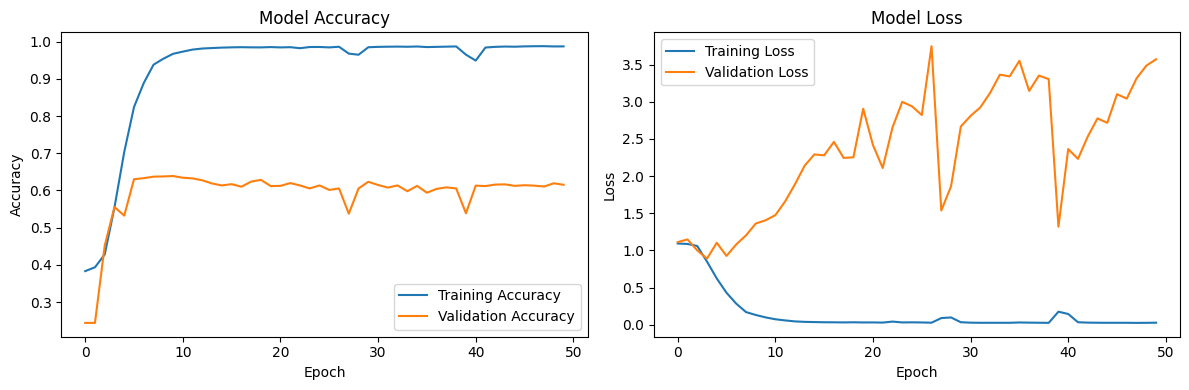

In [5]:
# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 10, input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(len(label_encoder.classes_), activation='softmax')
])

# Display model summary
model.summary()

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_data=(X_test, y_test),
                    verbose=1)

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

## Part 3: Extract and Visualize Word Embeddings

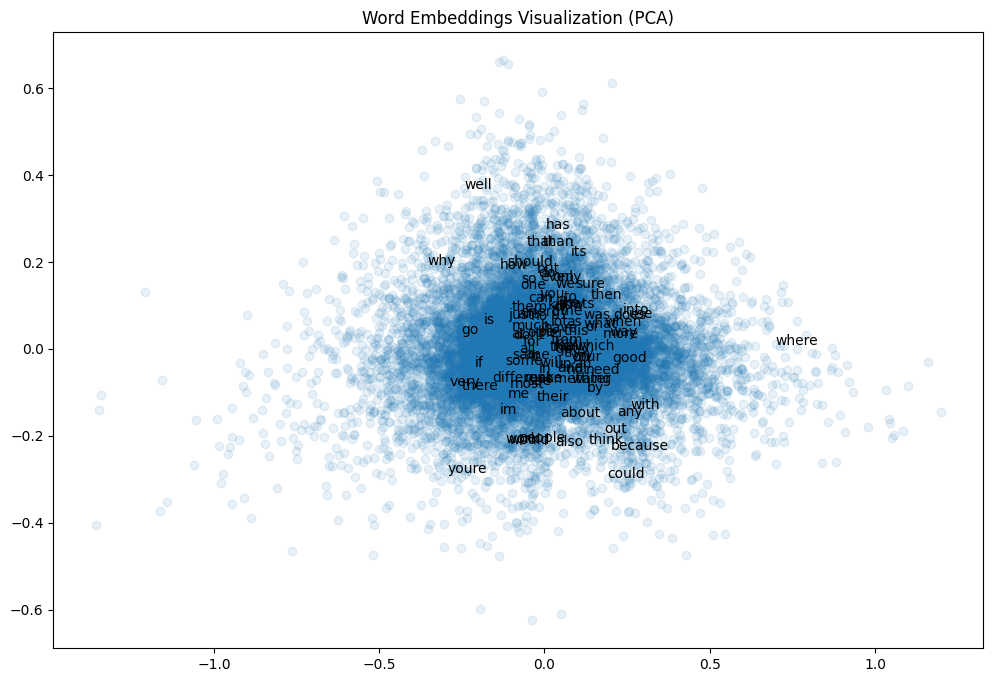

In [6]:
# Extract embeddings
embedding_layer = model.layers[0]
weights = embedding_layer.get_weights()[0]

# Apply PCA for visualization
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(weights)

# Plot embeddings
plt.figure(figsize=(12, 8))
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], alpha=0.1)

# Add some word labels
for i, word in enumerate(list(word_index.keys())[:100]):  # Plot first 100 words
    plt.annotate(word, (reduced_embeddings[i, 0], reduced_embeddings[i, 1]))

plt.title('Word Embeddings Visualization (PCA)')
plt.show()

### Predict Classes for Given Descriptions

In [7]:
def predict_category(text):
    # Preprocess text
    processed_text = preprocess_text(text)
    # Convert to sequence
    sequence = tokenizer.texts_to_sequences([processed_text])
    # Pad sequence
    padded = pad_sequences(sequence, maxlen=max_length, padding='post')
    # Predict
    prediction = model.predict(padded)
    predicted_class = label_encoder.inverse_transform([np.argmax(prediction)])[0]
    return predicted_class

# Test cases
test_texts = [
    "For the last one, neutrinos have mass. This is well established at many many sigma. There is good agreement in the so-called solar parameters between solar oscillations measured by SNO, Borexino, SuperK, and others with long-baseline reactor measurements by KamLand. The former measurement will improve considerably with DUNE and the latter with JUNO.",
    "Polypropylene is used specifically for its chemical inert-ness. You're not going to have much luck with a chemical solvent.\n\nYeah, I read something like that. To be honest, I can't be arsed to melt in a metal mesh"
]

for i, text in enumerate(test_texts, 1):
    predicted = predict_category(text)
    print(f"\nTest Case {i}:")
    print(f"Predicted Topic: {predicted}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step

Test Case 1:
Predicted Topic: Physics
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step

Test Case 2:
Predicted Topic: Chemistry


### Calculate Cosine Similarity

In [8]:
def get_word_embedding(word):
    if word in word_index:
        return weights[word_index[word]]
    return None

def calculate_cosine_similarity(word1, word2):
    emb1 = get_word_embedding(word1.lower())
    emb2 = get_word_embedding(word2.lower())
    
    if emb1 is not None and emb2 is not None:
        similarity = cosine_similarity([emb1], [emb2])[0][0]
        return similarity
    return None

# Calculate similarities for given word pairs
word_pairs = [
    ('concentration', 'purity'),
    ('safety', 'precaution'),
    ('toxic', 'harmful')
]

for word1, word2 in word_pairs:
    similarity = calculate_cosine_similarity(word1, word2)
    if similarity is not None:
        print(f"Cosine similarity between '{word1}' and '{word2}': {similarity:.4f}")
    else:
        print(f"One or both words not found in vocabulary: {word1}, {word2}")

Cosine similarity between 'concentration' and 'purity': 0.3727
One or both words not found in vocabulary: safety, precaution
Cosine similarity between 'toxic' and 'harmful': 0.2604
